# Visualisation of the processed logger data

In [1]:
#IMPORT LIBRARIES
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statannotations.Annotator import Annotator
import matplotlib.ticker as plticker
from matplotlib.lines import Line2D


healthColours = {'NN':'tab:blue','RES':'tab:green','DAM':'tab:orange'}
hueorder = ['NN','RES','DAM']

In [2]:
mergeDf = pd.read_csv('EXPORT/p_mergedData.csv')

In [3]:
mergeDf.describe()

,Hour,Day,Week,Month,Quarter,Year,Temperature(Logger),Temperature(Baro),mmHg(Logger),mmHg(Baro),mmH2O,A,B,C,E,WTD(mm)
count,166873.000000,166873.000000,166873.000000,166873.000000,166873.000000,166873.000000,166849.000000,166870.000000,166849.000000,166870.000000,166849.000000,166873.0,166873.000000,166873.000000,166873.000000,166849.000000
mean,11.494969,208.619711,30.149785,7.363660,2.807195,2021.852966,8.304339,8.220555,789.700319,733.422061,765.085372,20.0,75.778185,944.497073,888.718888,123.632133
std,6.922841,107.553210,15.264476,3.521737,1.126153,0.558475,2.215131,6.298369,17.514156,16.424650,135.234257,0.0,33.078420,59.606700,85.878139,103.021147
min,0.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,4.342000,-14.612000,710.946000,687.299000,-36.693175,20.0,50.000000,835.000000,675.000000,-65.086181
25%,5.000000,122.000000,18.000000,5.000000,2.000000,2022.000000,6.028915,3.813293,777.690800,720.708600,700.654747,20.0,55.000000,880.000000,800.000000,55.775734
50%,11.000000,235.000000,34.000000,8.000000,3.000000,2022.000000,8.626000,7.910431,792.569200,737.248000,785.716569,20.0,63.000000,980.000000,931.000000,97.999396
75%,17.000000,296.000000,43.000000,10.000000,4.000000,2022.000000,10.230180,12.092900,802.984900,746.416400,855.648404,20.0,80.000000,980.000000,938.000000,155.402805
max,23.000000,365.000000,52.000000,12.000000,4.000000,2023.000000,12.005910,38.222000,831.902600,775.045000,1039.929984,20.0,180.000000,1010.000000,980.000000,926.090883


## 1. Temperature

<AxesSubplot:xlabel='Month', ylabel='Temperature(Baro)'>

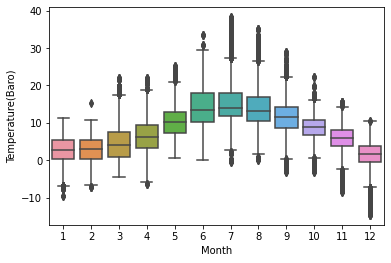

In [4]:
# Barometer temperature against month
sns.boxplot(x='Month',y='Temperature(Baro)',data=mergeDf)

<AxesSubplot:xlabel='Hour', ylabel='Temperature(Baro)'>

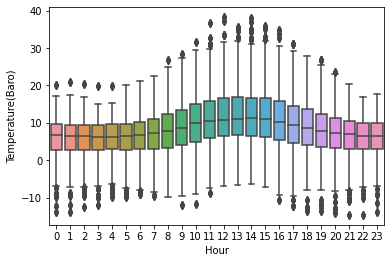

In [5]:
# Barometer temperature against hour
sns.boxplot(x='Hour',y='Temperature(Baro)',data=mergeDf)

<AxesSubplot:xlabel='Month', ylabel='Temperature(Logger)'>

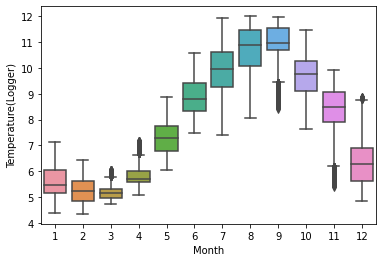

In [6]:
# Logger temperature against month
sns.boxplot(x='Month',y='Temperature(Logger)',data=mergeDf)

<AxesSubplot:xlabel='Hour', ylabel='Temperature(Logger)'>

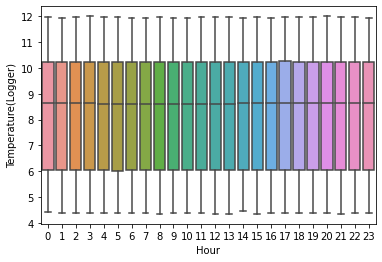

In [7]:
# Logger temperature against hour
sns.boxplot(x='Hour',y='Temperature(Logger)',data=mergeDf)

Text(0, 0.5, 'Temperature (C)')

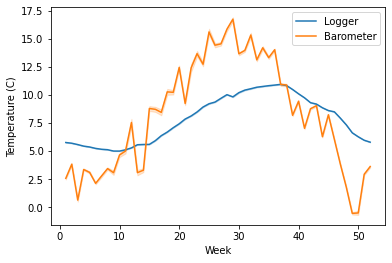

In [8]:
# Barometer vs logger temperature against week
ax = sns.lineplot(x='Week',y='Temperature(Logger)',data=mergeDf)
sns.lineplot(x='Week',y='Temperature(Baro)',data=mergeDf, ax=ax)
ax.legend(['Logger','Barometer'])
ax.set_ylabel('Temperature (C)')

Text(0, 0.5, 'Temperature (C)')

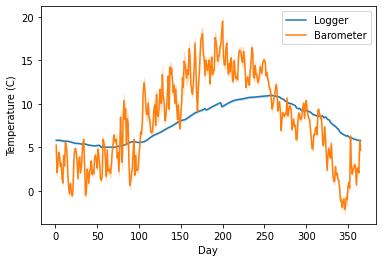

In [9]:
# Barometer vs logger temperature against day
ax = sns.lineplot(x='Day',y='Temperature(Logger)',data=mergeDf)
sns.lineplot(x='Day',y='Temperature(Baro)',data=mergeDf, ax=ax)
ax.legend(['Logger','Barometer'])
ax.set_ylabel('Temperature (C)')

Text(0, 0.5, 'Temperature (C)')

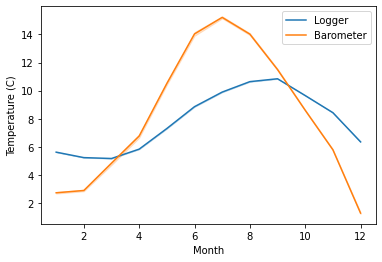

In [10]:
# Barometer vs logger temperature against month
ax = sns.lineplot(x='Month',y='Temperature(Logger)',data=mergeDf)
sns.lineplot(x='Month',y='Temperature(Baro)',data=mergeDf, ax=ax)
ax.legend(['Logger','Barometer'])
ax.set_ylabel('Temperature (C)')

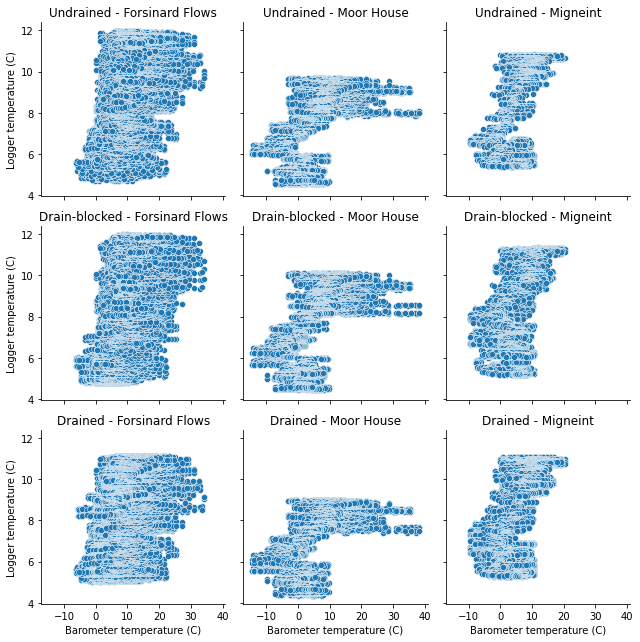

In [11]:
# Barometer vs logger temperature at each region/site 
g = sns.FacetGrid(mergeDf, col = 'Site',row = 'Region', row_order = hueorder)
g.map(sns.scatterplot, "Temperature(Baro)", "Temperature(Logger)")

Titles = ['Undrained - Forsinard Flows',
          'Undrained - Moor House',
          'Undrained - Migneint',
          'Drain-blocked - Forsinard Flows',
          'Drain-blocked - Moor House',
          'Drain-blocked - Migneint',
          'Drained - Forsinard Flows',
          'Drained - Moor House',
          'Drained - Migneint']

i=0
for axg in g.axes:
    for ax in axg:
        ax.set_xlabel('Barometer temperature (C)')
        ax.set_ylabel('Logger temperature (C)')
        ax.set_title(Titles[i])
        i+=1

Text(0.5, 0, '')

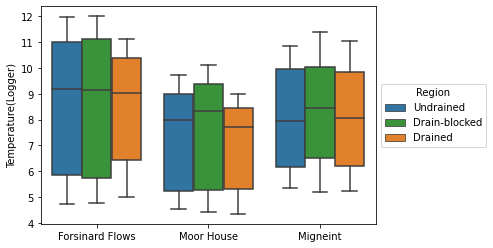

In [12]:
# Logger temperature at each region/site
healthColours = {'NN':'tab:blue','RES':'tab:green','DAM':'tab:orange'}
hueorder = ['NN','RES','DAM']
ax = sns.boxplot(y='Temperature(Logger)',x='Site', hue = 'Region', palette = healthColours, hue_order = hueorder, data=mergeDf)
#plt.xticks(rotation=45, ha='right')
ax.set_xticklabels(['Forsinard Flows', 'Moor House', 'Migneint'])
current_handles, current_labels = plt.gca().get_legend_handles_labels()
plt.legend(labels = ['Undrained','Drain-blocked','Drained'], handles = current_handles, loc='center left', bbox_to_anchor=(1, 0.5), title = 'Region')
ax.set_xlabel('')

In [13]:
# Variation in logger temperature at each region/site
print(mergeDf.groupby(['Site','Region'])['Temperature(Logger)'].var())

Site  Region
FF    DAM       3.845144
      NN        5.851302
      RES       6.145006
MH    DAM       2.362314
      NN        3.130301
      RES       4.040466
Mig   DAM       3.900560
      NN        3.963493
      RES       3.781166
Name: Temperature(Logger), dtype: float64


Broad conclusions:
 - Logger temperature experiences less variation than surface temperature and never drops below 4 C. 
 - Logger temperature lags behind surface temperature. It takes longer to heat up and cool down. 
 - Drained regions have less variability in logger temperature than undrained or drain-blocked regions (for Forsinard Flows and Moor House).
 
Why?
 - Specific heat capacity of water.
 - Insulating effects of peat and vegetation. 
 - Drained peat has higher specific heat capacity and greater water table depth. This increases the insulating effect of the peat on the water temperature.


## 2. Water table depth

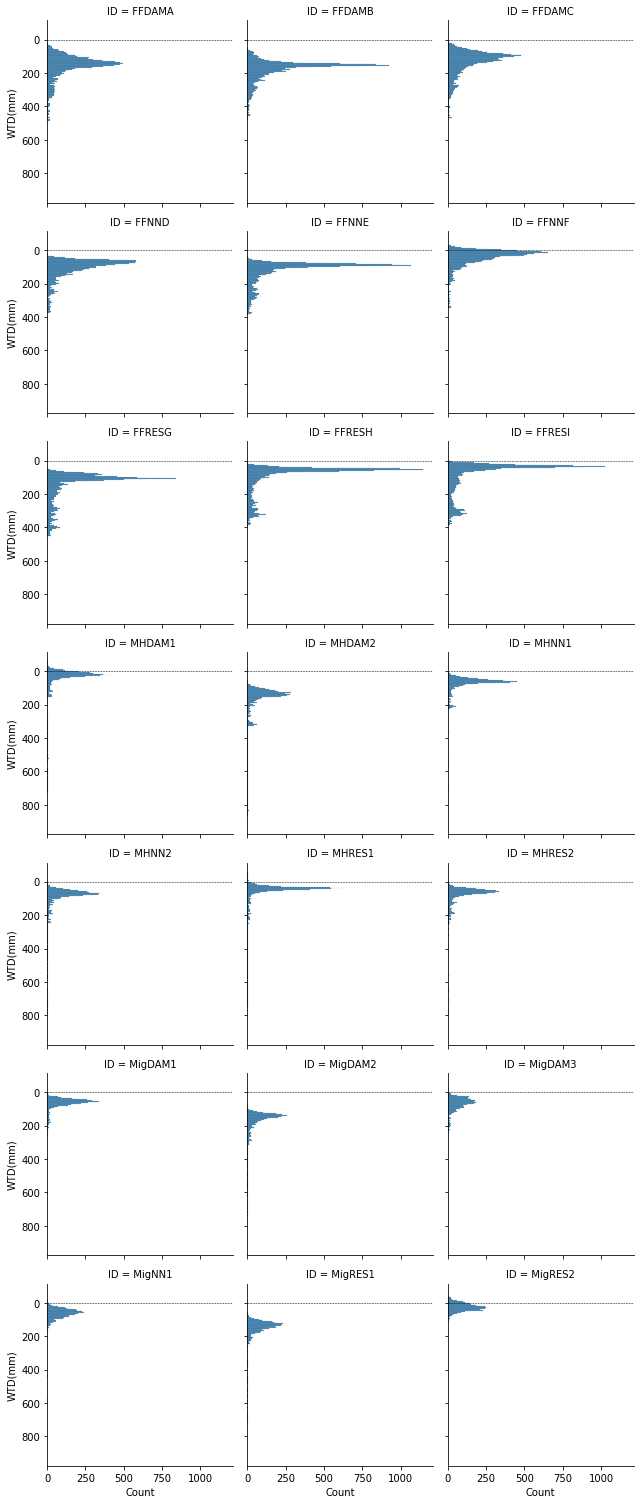

In [14]:
# Histograms of water table depth for each logger
Titles = ['FF, Drained, Logger i',
          'FF, Drained, Logger ii',
          'FF, Drained, Logger iii',
          'FF, Undrained, Logger i',
          'FF, Undrained, Logger ii',
          'FF, Undrained, Logger iii',
          'FF, Drain-blocked, Logger i',
          'FF, Drain-blocked, Logger ii',
          'FF, Drain-blocked, Logger iii',
          'MH, Drained, Logger i',
          'MH, Drained, Logger ii',
          'MH, Undrained, Logger i',
          'MH, Undrained, Logger ii',
          'MH, Drain-blocked, Logger i',
          'MH, Drain-blocked, Logger ii',
          'MG, Drained, Logger i',
          'MG, Drained, Logger ii',
          'MG, Drained, Logger iii',
          'MG, Undrained, Logger i',
          'MG, Drain-blocked, Logger i',
          'MG, Drain-blocked, Logger ii']

g = sns.displot(data=mergeDf, col='ID', y='WTD(mm)', kind='hist', col_wrap = 3, height=3, row_order = hueorder)

i=0
for ax in g.axes:
    ax.invert_yaxis()
    ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
#    ax.set_title(Titles[i])
    i+=1

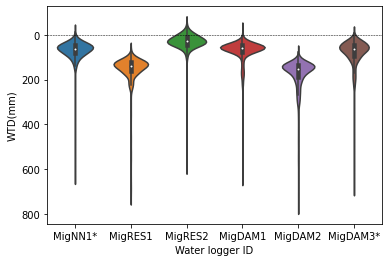

In [15]:
# Violin plot of WTD at Migneint
subDf = mergeDf[mergeDf['Site'] == 'Mig']
ax = sns.violinplot(y='WTD(mm)',x='ID', data=subDf, order=['MigNN1','MigRES1','MigRES2','MigDAM1','MigDAM2','MigDAM3'])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax.set_xlabel('Water logger ID')
ax.set_xticklabels(['MigNN1*','MigRES1','MigRES2','MigDAM1','MigDAM2','MigDAM3*'])
plt.savefig('export/violin_wtd_mig.svg')

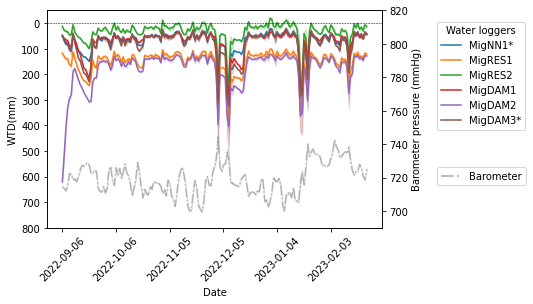

In [16]:
# Line plot of WTD at Migneint. Barometer pressure plotted on a secondary axis.
fig, ax = plt.subplots()
sns.lineplot(y='WTD(mm)',x='Date',hue='ID', data=subDf, hue_order=['MigNN1','MigRES1','MigRES2','MigDAM1','MigDAM2','MigDAM3'],ax=ax)
#ax = sns.lineplot(y='WTD(mm)',x='Date', data=subDf)
ax.set_ylim([-50,800])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax2 = plt.twinx()
sns.lineplot(y='mmHg(Baro)',x='Date', ax=ax2, data = subDf, alpha = .5, linestyle = '-.', color='grey')
ax2.set_ylim([690,820])
ax2.set_ylabel('Barometer pressure (mmHg)')
loc = plticker.MultipleLocator(base=30) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.tick_params(axis='x', labelrotation = 45)
custom_line = [Line2D([0], [0], color='grey', lw=2, linestyle = '-.', alpha = 0.5)]
ax.legend(loc='center left', labels = ['MigNN1*','MigRES1','MigRES2','MigDAM1','MigDAM2','MigDAM3*'], bbox_to_anchor=(1.15, 0.7), title = 'Water loggers')
ax2.legend(custom_line, ['Barometer'], bbox_to_anchor=(1.15, 0.3),)
plt.savefig('export/line_wtd_mig.svg',bbox_inches='tight')

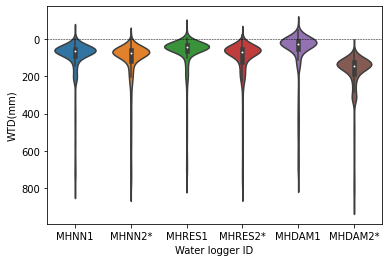

In [17]:
# Violin plot of WTD at Moor House
subDf = mergeDf[mergeDf['Site'] == 'MH']
ax = sns.violinplot(y='WTD(mm)',x='ID', data=subDf, order =['MHNN1','MHNN2','MHRES1','MHRES2','MHDAM1','MHDAM2'])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax.set_xlabel('Water logger ID')
ax.set_xticklabels(['MHNN1','MHNN2*','MHRES1','MHRES2*','MHDAM1','MHDAM2*'])
plt.savefig('export/violin_wtd_mh.svg')

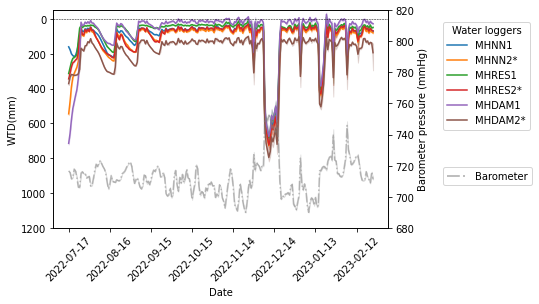

In [18]:
# Violin plot of WTD at Moor House. Barometer pressure plotted on a secondary axis.
fig, ax = plt.subplots()
sns.lineplot(y='WTD(mm)',x='Date',hue='ID', data=subDf, hue_order=['MHNN1','MHNN2','MHRES1','MHRES2','MHDAM1','MHDAM2'],ax=ax)
#ax = sns.lineplot(y='WTD(mm)',x='Date', data=subDf)
ax.set_ylim([-50,1200])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax2 = plt.twinx()
sns.lineplot(y='mmHg(Baro)',x='Date', ax=ax2, data = subDf, alpha = .5, linestyle = '-.', color='grey')
ax2.set_ylim([680,820])
ax2.set_ylabel('Barometer pressure (mmHg)')
loc = plticker.MultipleLocator(base=30) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.tick_params(axis='x', labelrotation = 45)
custom_line = [Line2D([0], [0], color='grey', lw=2, linestyle = '-.', alpha = 0.5)]
ax.legend(loc='center left', labels=['MHNN1','MHNN2*','MHRES1','MHRES2*','MHDAM1','MHDAM2*'], bbox_to_anchor=(1.15, 0.7), title = 'Water loggers')
ax2.legend(custom_line, ['Barometer'], bbox_to_anchor=(1.15, 0.3),)
plt.savefig('export/line_wtd_mh.svg',bbox_inches='tight')

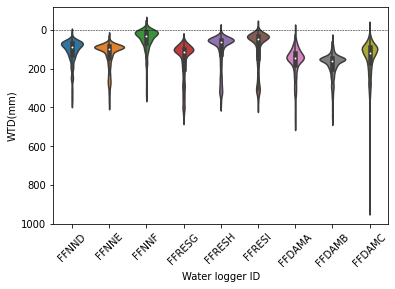

In [19]:
# Violin plot of WTD at Forsinard Flows
subDf = mergeDf[mergeDf['Site'] == 'FF']
ax = sns.violinplot(y='WTD(mm)',x='ID', data=subDf, order = ['FFNND','FFNNE','FFNNF','FFRESG','FFRESH','FFRESI','FFDAMA','FFDAMB','FFDAMC'])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax.set_xlabel('Water logger ID')
ax.tick_params(axis='x', labelrotation = 45)
plt.savefig('export/violin_wtd_ff.svg')

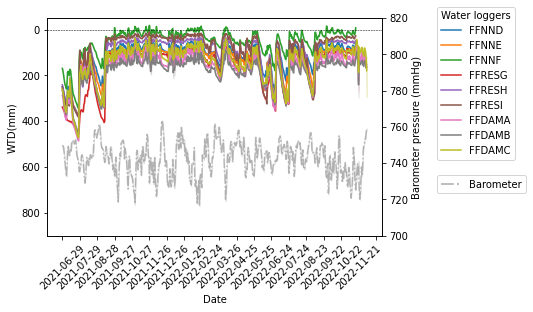

In [20]:
# Line plot of WTD at Forsinard Flows. Barometer pressure plotted on a secondary axis.
fig, ax = plt.subplots()
sns.lineplot(y='WTD(mm)',x='Date',hue='ID', data=subDf, hue_order=['FFNND','FFNNE','FFNNF','FFRESG','FFRESH','FFRESI','FFDAMA','FFDAMB','FFDAMC'],ax=ax)
#ax = sns.lineplot(y='WTD(mm)',x='Date', data=subDf)
ax.set_ylim([-50,900])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax2 = plt.twinx()
sns.lineplot(y='mmHg(Baro)',x='Date', ax=ax2, data = subDf, alpha = .5, linestyle = '-.', color='grey')
ax2.set_ylim([700,820])
ax2.set_ylabel('Barometer pressure (mmHg)')
loc = plticker.MultipleLocator(base=30) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.tick_params(axis='x', labelrotation = 45)
custom_line = [Line2D([0], [0], color='grey', lw=2, linestyle = '-.', alpha = 0.5)]
ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.7), title = 'Water loggers')
ax2.legend(custom_line, ['Barometer'], bbox_to_anchor=(1.15, 0.3),)
plt.savefig('export/line_wtd_ff.svg',bbox_inches='tight')

In [21]:
# Summarise the data from each logger
A = mergeDf[["ID", "WTD(mm)"]].groupby("ID").mean()
A['median'] = mergeDf[["ID", "WTD(mm)"]].groupby("ID").median()
A['max'] = mergeDf[["ID", "WTD(mm)"]].groupby("ID").max()
A['min'] = mergeDf[["ID", "WTD(mm)"]].groupby("ID").min()
A['var'] = mergeDf[["ID", "WTD(mm)"]].groupby("ID").var()
A.to_csv('WTD_summary_stats.csv')
A

,WTD(mm),median,max,min,var
ID,,,,,
FFDAMA,165.528569,146.761701,492.727087,-2.634853,6175.484193
FFDAMB,182.790984,159.914478,470.629129,44.912167,4289.082491
FFDAMC,144.326423,119.295111,926.090883,-15.800757,6844.926385
FFNND,113.936819,91.063175,379.048179,14.689982,4385.363447
FFNNE,129.614909,97.704177,388.646115,34.489681,4831.145699
FFNNF,52.173554,32.076237,349.042594,-46.543547,4009.451610
FFRESG,162.463459,113.363957,455.674300,48.741689,9897.238396
FFRESH,109.388893,61.883778,388.178414,0.457038,8580.567230
FFRESI,103.348666,48.696855,392.613459,-15.470658,10384.451278


Broad conclusions:
 - Position of logger relative to drain has large impact on water table depth (e.g. MIGRES1 vs MIGRES2, MIGDAM1 vs MIGDAM2).
 - Some spikes in water table depth are due to sudden spikes in barometer pressure (e.g. Moor House November 2022). 
 - Undrained and Drain-blocked loggers have higher mean WTD and lower variance than drained loggers in general.
 - The lowest values are detected in drained bogs. 
